In [5]:
from czibench.datasets.sc import SingleCellDataset
from czibench.datasets.types import Organism
from czibench.runner import ContainerRunner
from czibench.tasks.sc import ClusteringTask, EmbeddingTask


dataset = SingleCellDataset(
    "example.h5ad",
    organism=Organism.HUMAN,
)


runner = ContainerRunner(
    image="czibench-scgpt:latest",
    gpu=True,
)

dataset = runner.run(dataset)

In [6]:
task = ClusteringTask(label_key="cell_type")
dataset, clustering_results = task.run(dataset)

task = EmbeddingTask(label_key="cell_type")
dataset, embedding_results = task.run(dataset)

In [7]:
clustering_results

{'adjusted_rand_index': 0.535424875903426,
 'normalized_mutual_info': np.float64(0.6957958380492815)}

In [8]:
embedding_results

{'silhouette_score': np.float32(0.06754466)}

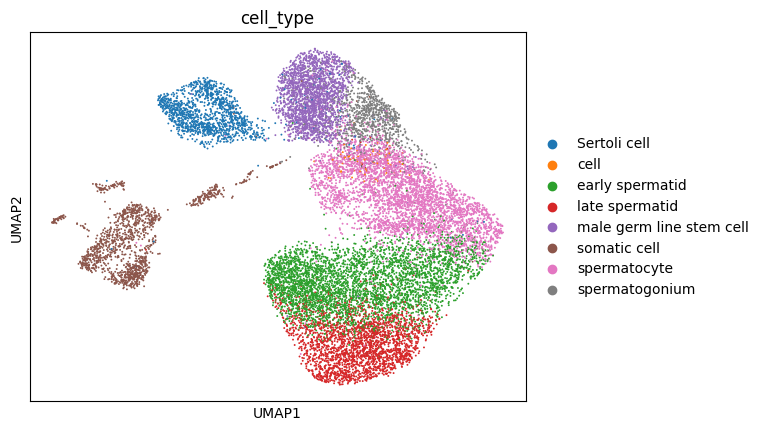

In [9]:
import scanpy as sc
sc.tl.umap(dataset.adata)
sc.pl.umap(dataset.adata, color="cell_type")